<a href="https://colab.research.google.com/github/JinnyYam/mining22/blob/main/ITB_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansN

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd                  # 판다스 임포트
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt      # 맷플롭 임포트
import matplotlib.font_manager as fm   # 폰트 관련
mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지  ##############################

#데이터 불러오기
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining/health_data2.csv',encoding='euc-kr')

# 폰트 관련 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
#fm._rebuild()  # 폰트 적용

Mounted at /content/drive
NanumGothic Eco


In [5]:
display(data.head())
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 전처리 (결측치 모두 제거& string값 대체)
#display(data.isna().sum())
data=data.dropna(axis=0)
#data=pd.get_dummies(data['음주여부'])

# 인덱스 추출
x = data.iloc[:, 2:17]  # 독립변수는 연령대코드부터 감마지티피까지
y = data.iloc[:, 1:2]    # 종속변수는 성별

# 훈련 데이터와 테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)


,시도코드,성별코드,연령대코드,신장,체중,허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부
0,36,M,9,165,60,72.1,1.2,1.5,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
1,27,F,13,150,65,81.0,0.8,0.8,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,No,No
2,11,F,12,155,55,70.0,0.6,0.7,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,No,No
3,31,M,13,160,70,90.8,1.0,1.0,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,No,No
4,41,F,12,155,50,75.2,1.5,1.2,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No


#1.의사결정나무트리로 학습하기

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.899
변수의 중요도:
 [0.03874707 0.54911804 0.0089614  0.02550787 0.0109038  0.01218288
 0.01047871 0.0123171  0.01869357 0.16142793 0.00150319 0.09053161
 0.0146654  0.01065394 0.03430747]
Index(['연령대코드', '신장', '체중', '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압', '공복혈당',
       '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피'],
      dtype='object')
Index(['성별코드'], dtype='object')


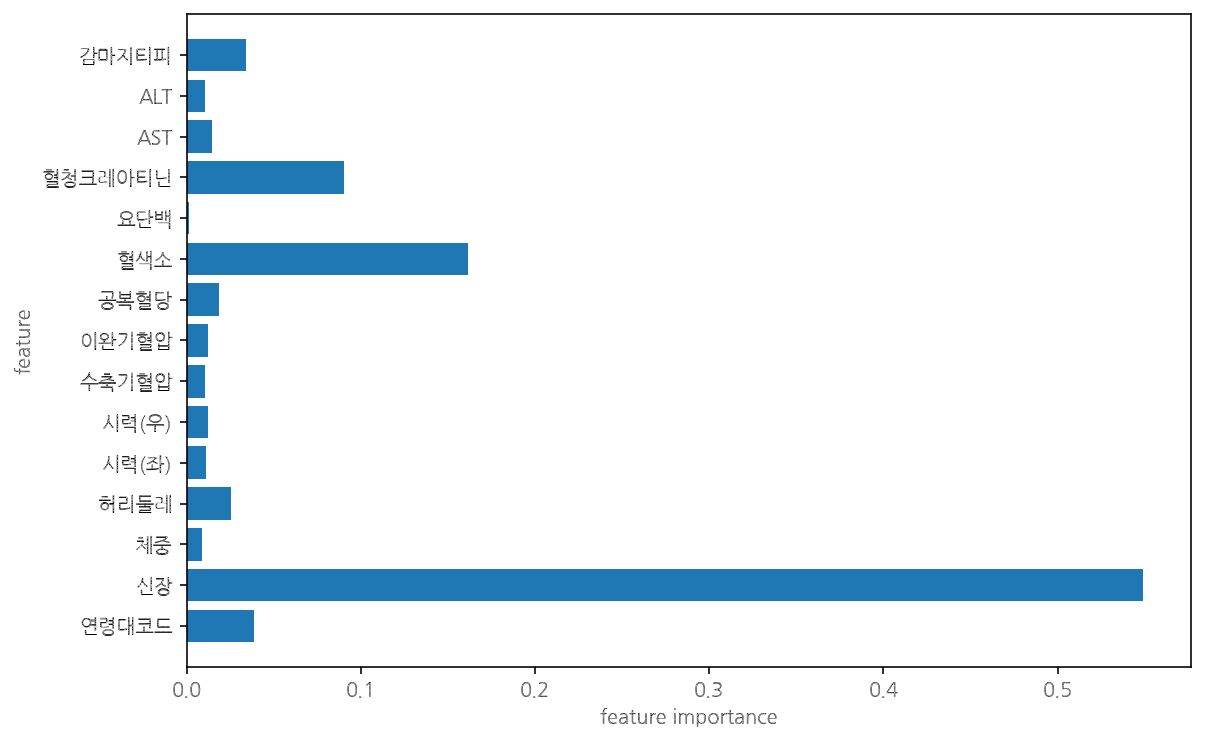

In [6]:
#의사결정나무 트리 만들기
tree = DecisionTreeClassifier(random_state=0)  # 가능한 많은 깊이로!
#훈련시키기
tree.fit(x_train, y_train) # fit메소드의 변수차은 독립 학습,종속 학습으로!

#의사 결정 나무의 정확도 출력
print("학습용 데이터 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(x_test, y_test)))

result = tree.feature_importances_
print("변수의 중요도:\n", result) #무슨 변수인지 모르죠
print(x.columns)
print(y.columns)
import numpy as np
import matplotlib
#matplotlib.font_manager._rebuild()
def plot_feature_importances_wisc(model): # 중요도를 보여주는 그래프를 만드는 함수 정의
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(x.columns)  # 30개_전체변수의 개수
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x.columns)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

# 2. 랜덤포레스트로 학습하기


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.940


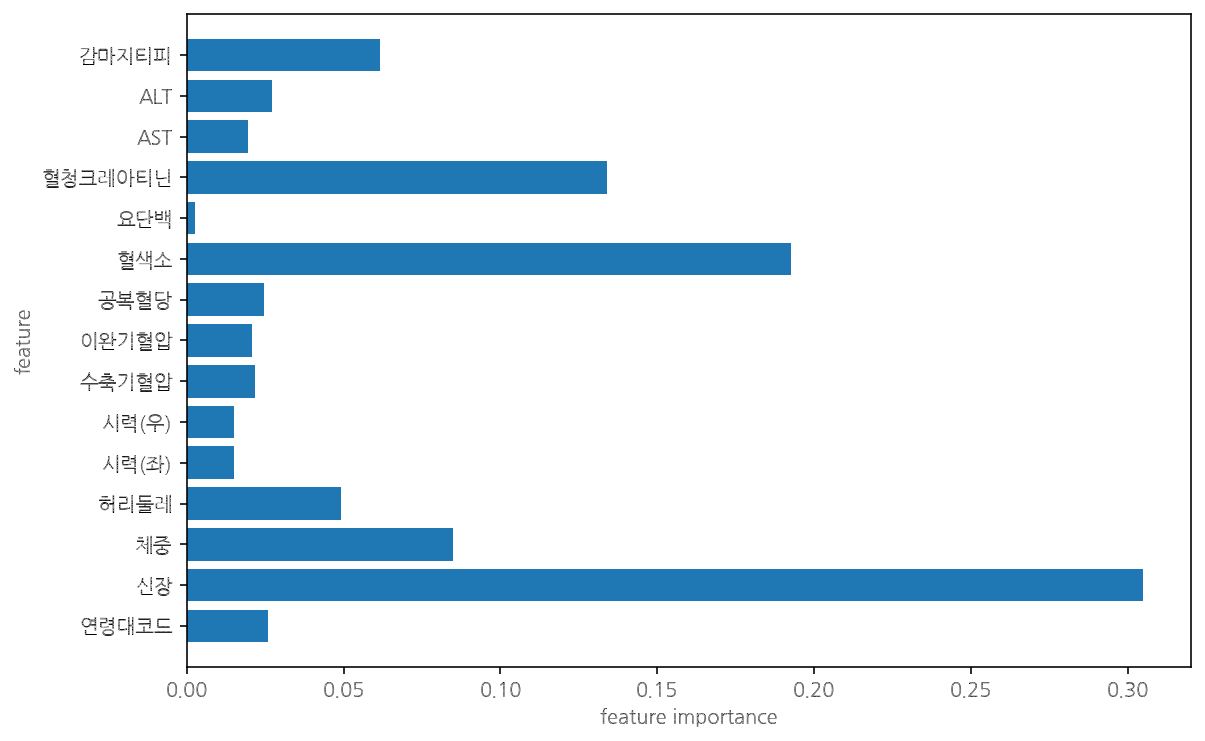

In [7]:
from sklearn.ensemble import RandomForestClassifier
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=300, random_state=0)
forest.fit(x_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))
# 100번 돌려서 가중평균했더니 결과가 좋다. 의사결정나무 하나만 쓰는 것보다 앙상블일때 결과가 좋다!!
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_wisc(forest) # 싱글 의사결정나무를 사용할때보다 더 많은 변수가 이용됨

# 3. 그레디언트 부스팅

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

#
gbrt = GradientBoostingClassifier(n_estimators=300,random_state=0, learning_rate = 0.1)
gbrt.fit(x_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.970
시험용 데이터 세트 정확도: 0.948


# 인사이트 도출


## 코드 설명
남성인지 여성인지를 종속변수 Y로 놓고, 나머지 수치 데이터를 독립변수 x로 설정하였다.
각각 의사결정나무트리,랜덤 포레스트, 그레디언트 부스팅을 이용하여 분류하였다.
정확성을 확인하기 위해서 score함수를 이용하였다.

## 인사이트 도출
### 1. 남녀를 결정짓는 가장 중요한 요소는 순서대로 신장,혈색소, 혈청 크레아티닌이었다. 
### 2. 랜덤 포레스트보다 그레디언트 부스팅이 과적합을 방지할 수 있었다.